In [1]:
# Imports
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.models import Model
from sklearn.metrics import mean_absolute_error
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
%matplotlib inline

In [2]:
diamond_df = pd.read_csv(
    Path("Diamonds_price_data.csv")
)

# Review the DataFrame
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


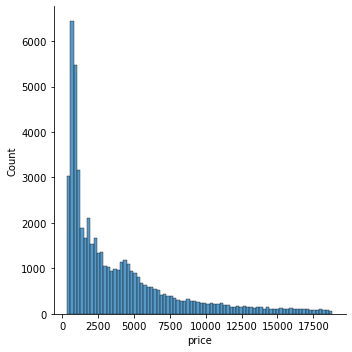

In [3]:
sns.displot(diamond_df['price'])

In [4]:
#convert the Data
diamond_df['color'] = diamond_df['color'].replace(['J','I','H','G','F','E','D'],[1,2,3,4,5,6,7])
diamond_df['cut'] = diamond_df['cut'].replace(['Fair','Good','Very Good','Premium','Ideal'],[1,2,3,4,5])
diamond_df['clarity'] = diamond_df['clarity'].replace(['I3','I2','I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],[1,2,3,4,5,6,7,8,9,10])

X = diamond_df.drop(columns=["price"]).copy()
diamond_df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,6,4,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,6,5,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,6,7,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,2,6,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,1,4,63.3,58.0,335,4.34,4.35,2.75


In [5]:
y = diamond_df["price"]
y[:5]

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [6]:
#Drop Price from the seature set
features = diamond_df.drop(['price'], axis=1).values

#Mark Price as the label set
labels = diamond_df['price'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [8]:
#Scale the Data 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#Creating the neural network will contain an input layer, four hidden layers and one output layer. 
input_layer = Input(shape=(features.shape[1],))
l1 = Dense(250, activation='relu')(input_layer)
l2 = Dense(125, activation='relu')(l1)
l3 = Dense(100, activation='relu')(l2)
l4 = Dense(25, activation='relu')(l3)
output = Dense(1)(l3)

In [10]:
#use .compile to compile the Model
model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_absolute_error" , optimizer="adam", metrics=["mean_absolute_error"])

In [11]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 250)               2750      
                                                                 
 dense_1 (Dense)             (None, 125)               31375     
                                                                 
 dense_2 (Dense)             (None, 100)               12600     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 46,826
Trainable params: 46,826
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
#Run the model 
history = model.fit(X_train, y_train, batch_size=2, epochs=20, verbose=1, validation_split=0.2)



Epoch 1/20
16183/16183 [==============================] - 27s 2ms/step - loss: 478.5203 - mean_absolute_error: 478.5203 - val_loss: 365.1108 - val_mean_absolute_error: 365.1108
Epoch 2/20
16183/16183 [==============================] - 26s 2ms/step - loss: 330.6893 - mean_absolute_error: 330.6893 - val_loss: 249.3960 - val_mean_absolute_error: 249.3960
Epoch 3/20
16183/16183 [==============================] - 26s 2ms/step - loss: 220.9437 - mean_absolute_error: 220.9437 - val_loss: 193.0248 - val_mean_absolute_error: 193.0248
Epoch 4/20
16183/16183 [==============================] - 26s 2ms/step - loss: 141.1618 - mean_absolute_error: 141.1618 - val_loss: 92.8767 - val_mean_absolute_error: 92.8767
Epoch 5/20
16183/16183 [==============================] - 26s 2ms/step - loss: 108.0541 - mean_absolute_error: 108.0541 - val_loss: 71.5232 - val_mean_absolute_error: 71.5232
Epoch 6/20
16183/16183 [==============================] - 26s 2ms/step - loss: 90.5263 - mean_absolute_error: 90.5263 -

In [13]:
pred_train = model.predict(X_train)
print(mean_absolute_error(y_train,pred_train))

pred = model.predict(X_test)
print(mean_absolute_error(y_test,pred))

1265/1265 [==============================] - 1s 1ms/step
57.235493385470896
422/422 [==============================] - 0s 1ms/step
56.52097226759101


In [14]:
#df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)

# Display the evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

422/422 - 1s - loss: 56.5210 - mean_absolute_error: 56.5210 - 532ms/epoch - 1ms/step
Loss: 56.52096939086914, Accuracy: 56.52096939086914
